# Spatial Analysis III

In the last lecture we have seen operations involving single and multiple layers. In this lecture we will look into one of the most powerful concepts in spatial analysis involving multiple spatial layers called Spatial Joins. 

## Spatial Joins

Spatial joins are operations that combine data from two or more spatial data sets based on their geometric relationship. Until now we have seen joins based on attribute relationships. 

Spatial join operations require two parameters, the *predicament* (the geometric condition that needs to be met between two geometries) and the *join* type.We have already covered some of the commonly used predicaments such as within,contains, intersects as well as the commonly used join types (left,right,inner and outer). Let's look at the different predicaments through some examples.

### Contains

We have already seen contains predicament when dealing with multiple layers with one layer containing only one geometry. Now we want to compare multiple layers containing multiple geometries. The figure below shows some of the common use case of contains predicate. 

![sjoin_contains](images/sjoin_contains.png)

In real world the questions could be

1) Find all the zip codes that doesnot have a vaccination center

2) Find the total number of carehomes in each counties

3) Find the counties that does not have a hospital with more than 1000 beds. 

More spatial questions that you can think about??

Ok let's look into a couple of examples

Find the zipcodes in Ohio with/without starbucks?

Let's load our datasets.

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
zipUSA = gpd.read_file(r'../../largedatasets/cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k.shp')
zipUSA.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [3]:
zipUSA.shape

(33144, 6)

This has zipcode for the entire nation. So how do we find the zip codes that are with in Ohio. We can check all the zip codes that are with in the state of ohio using the methods that we have learned in the last lecture. So let us load the state boundary shapefile. 

In [4]:
usBoundaries = gpd.read_file('../../largedatasets/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
usBoundaries

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


We can easily extract out the shape boundary for Ohio just using our plain old selections in pandas

<AxesSubplot:>

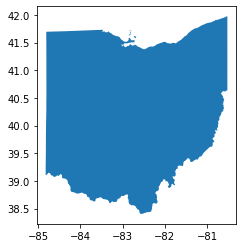

In [5]:
ohBoundary = usBoundaries[usBoundaries.STUSPS=='OH']
ohBoundary.plot()

Ok so we now have the required Ohio boundary. How will we find out the zip codes with in Ohio. 

We can use the **within** predicate that we have learned in the last lecture. 

Eventhough we can use zip polygons here, it does have its own caveats. For example the zip codes that are near to the state boundary might have overlaps with the neighboring state which will result in the within predicament being False. 

![sjoin_contains_centroid](images/sjoin_contains_centroid.png)

Let us first try the within preidcate with the zip polygons and then with zip centroids. 

But first........check the CRS

In [6]:
zipUSA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [7]:
ohBoundary.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Excellent!! so both the datasets are having the same spatial reference system. Now let's apply the method

In [8]:
zipUSA[zipUSA.within(ohBoundary.geometry.values[0])]

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
128,43084,8600000US43084,43084,55873705,66986,"MULTIPOLYGON (((-83.55152 40.11908, -83.54901 ..."
129,44493,8600000US44493,44493,648867,0,"POLYGON ((-80.89620 40.82808, -80.88319 40.827..."
130,44233,8600000US44233,44233,69162840,360814,"POLYGON ((-81.78510 41.27645, -81.75314 41.276..."
131,43203,8600000US43203,43203,3829119,0,"POLYGON ((-82.98503 39.96735, -82.98363 39.968..."
132,44671,8600000US44671,44671,2083710,0,"POLYGON ((-81.37493 40.65256, -81.35727 40.652..."
...,...,...,...,...,...,...
33072,43713,8600000US43713,43713,237831372,3228798,"POLYGON ((-81.23588 39.91597, -81.23430 39.949..."
33073,43021,8600000US43021,43021,92284552,7538129,"POLYGON ((-82.96734 40.24793, -82.96504 40.249..."
33074,43403,8600000US43403,43403,531801,0,"POLYGON ((-83.64305 41.38267, -83.64121 41.382..."
33105,45244,8600000US45244,45244,56886732,1579432,"POLYGON ((-84.40160 39.10921, -84.40048 39.110..."


As you can see there are 1063 records. Now lets try out with zip code centroids

In [9]:
zipUSACentroids = zipUSA.centroid

C:\Users\jxa421\AppData\Local\Temp\ipykernel_49892\949632944.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipUSACentroids = zipUSA.centroid


Now lets run within using this dataset

In [10]:
zipUSA[zipUSACentroids.within(ohBoundary.geometry.values[0])]

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
78,44123,8600000US44123,44123,6672614,1111163,"POLYGON ((-81.54259 41.60567, -81.52974 41.614..."
128,43084,8600000US43084,43084,55873705,66986,"MULTIPOLYGON (((-83.55152 40.11908, -83.54901 ..."
129,44493,8600000US44493,44493,648867,0,"POLYGON ((-80.89620 40.82808, -80.88319 40.827..."
130,44233,8600000US44233,44233,69162840,360814,"POLYGON ((-81.78510 41.27645, -81.75314 41.276..."
131,43203,8600000US43203,43203,3829119,0,"POLYGON ((-82.98503 39.96735, -82.98363 39.968..."
...,...,...,...,...,...,...
33072,43713,8600000US43713,43713,237831372,3228798,"POLYGON ((-81.23588 39.91597, -81.23430 39.949..."
33073,43021,8600000US43021,43021,92284552,7538129,"POLYGON ((-82.96734 40.24793, -82.96504 40.249..."
33074,43403,8600000US43403,43403,531801,0,"POLYGON ((-83.64305 41.38267, -83.64121 41.382..."
33105,45244,8600000US45244,45244,56886732,1579432,"POLYGON ((-84.40160 39.10921, -84.40048 39.110..."


You can easily notice the difference as this selection has 1196 records when compared to the previous selection of 1063 records. The culprits might be the zip codes that are at the boundaries. So lets assign our results to a new variable, which will be our zip codes from Ohio

In [11]:
ohZipCodes = zipUSA[zipUSACentroids.within(ohBoundary.geometry.values[0])]

Now let's get to the main part of this question which is to find out the zip codes in Ohio with/without starbucks. So let us load the starbucks data

In [12]:
starbucks = gpd.read_file(r'../../largedatasets/starbucks/starbucks.shp')
starbucks.head()

,pk_uid,geometry
0,1,POINT (-73.02315 40.82713)
1,2,POINT (-72.99688 40.82229)
2,3,POINT (-73.03259 40.77785)
3,4,POINT (-73.05505 40.86302)
4,5,POINT (-73.09551 40.78991)


In [13]:
starbucks.crs

Since startbucks doesnot have any crs information and since we know that the crs should be EPSG:4326 just from looking the geometry column, we can assign the crs as EPSG:4326 for the starbucks dataset. 

In [14]:
starbucks.crs = 'EPSG:4326'

Now our zip code dataset is in EPSG:4269. So let's convert the starbucks dataset to be in that projection

In [15]:
starbucks = starbucks.to_crs('EPSG:4269')

Now lets run our spatial join with ohZipCodes and starbucks to find out which zip codes has atleast one starbucks

In [16]:
ohZipCodes.sjoin(starbucks,how="inner",predicate="contains")

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,pk_uid
547,44011,8600000US44011,44011,53889975,150096,"POLYGON ((-82.06787 41.43003, -82.06707 41.459...",5341,5342
547,44011,8600000US44011,44011,53889975,150096,"POLYGON ((-82.06787 41.43003, -82.06707 41.459...",5339,5340
547,44011,8600000US44011,44011,53889975,150096,"POLYGON ((-82.06787 41.43003, -82.06707 41.459...",5337,5338
1254,43004,8600000US43004,43004,33509215,509666,"POLYGON ((-82.83354 40.01663, -82.83200 40.016...",9454,9455
1254,43004,8600000US43004,43004,33509215,509666,"POLYGON ((-82.83354 40.01663, -82.83200 40.016...",9453,9454
...,...,...,...,...,...,...,...,...
32970,43570,8600000US43570,43570,120853960,153014,"POLYGON ((-84.53639 41.59361, -84.49701 41.593...",9684,9685
32970,43570,8600000US43570,43570,120853960,153014,"POLYGON ((-84.53639 41.59361, -84.49701 41.593...",9685,9686
33074,43403,8600000US43403,43403,531801,0,"POLYGON ((-83.64305 41.38267, -83.64121 41.382...",9651,9652
33106,45431,8600000US45431,45431,29672773,18738,"POLYGON ((-84.13916 39.76564, -84.13696 39.765...",9598,9599


![sjoin_merge](images/sjoin_merge.png)

So if you just want to find out the unique zip codes that contains starbucks you can use drop_duplicates method

In [17]:
mergingRecords = ohZipCodes.sjoin(starbucks,how="inner",predicate="contains")
zipCodesOhioWithStarbucks = mergingRecords.drop_duplicates(subset=['ZCTA5CE10'])

In [18]:
zipCodesOhioWithStarbucks

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,pk_uid
547,44011,8600000US44011,44011,53889975,150096,"POLYGON ((-82.06787 41.43003, -82.06707 41.459...",5341,5342
1254,43004,8600000US43004,43004,33509215,509666,"POLYGON ((-82.83354 40.01663, -82.83200 40.016...",9454,9455
1257,45229,8600000US45229,45229,7076576,0,"POLYGON ((-84.50522 39.14826, -84.50457 39.149...",9386,9387
1733,44663,8600000US44663,44663,241491578,2068269,"POLYGON ((-81.60059 40.49838, -81.59772 40.502...",9566,9567
2655,45601,8600000US45601,45601,885668363,8382751,"POLYGON ((-83.18945 39.31604, -83.18396 39.318...",9422,9423
...,...,...,...,...,...,...,...,...
32919,43560,8600000US43560,43560,54113077,192282,"POLYGON ((-83.80615 41.72252, -83.78145 41.723...",9675,9676
32925,43035,8600000US43035,43035,50720671,8051805,"POLYGON ((-83.03994 40.15651, -83.03760 40.156...",9532,9533
32970,43570,8600000US43570,43570,120853960,153014,"POLYGON ((-84.53639 41.59361, -84.49701 41.593...",9684,9685
33074,43403,8600000US43403,43403,531801,0,"POLYGON ((-83.64305 41.38267, -83.64121 41.382...",9651,9652


Now can we find out the zip codes without any starbucks

In [19]:
allRecords = ohZipCodes.sjoin(starbucks,how="left",predicate="contains")
allRecords

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,pk_uid
78,44123,8600000US44123,44123,6672614,1111163,"POLYGON ((-81.54259 41.60567, -81.52974 41.614...",NaN,NaN
128,43084,8600000US43084,43084,55873705,66986,"MULTIPOLYGON (((-83.55152 40.11908, -83.54901 ...",NaN,NaN
129,44493,8600000US44493,44493,648867,0,"POLYGON ((-80.89620 40.82808, -80.88319 40.827...",NaN,NaN
130,44233,8600000US44233,44233,69162840,360814,"POLYGON ((-81.78510 41.27645, -81.75314 41.276...",NaN,NaN
131,43203,8600000US43203,43203,3829119,0,"POLYGON ((-82.98503 39.96735, -82.98363 39.968...",NaN,NaN
...,...,...,...,...,...,...,...,...
33073,43021,8600000US43021,43021,92284552,7538129,"POLYGON ((-82.96734 40.24793, -82.96504 40.249...",NaN,NaN
33074,43403,8600000US43403,43403,531801,0,"POLYGON ((-83.64305 41.38267, -83.64121 41.382...",9651.0,9652.0
33105,45244,8600000US45244,45244,56886732,1579432,"POLYGON ((-84.40160 39.10921, -84.40048 39.110...",NaN,NaN
33106,45431,8600000US45431,45431,29672773,18738,"POLYGON ((-84.13916 39.76564, -84.13696 39.765...",9598.0,9599.0


Now we can easily find out all the zip codes without any matches by filtering out the rows with NaN values for index_right column

In [20]:
zipCodesWithoutStarbucks = allRecords[allRecords.index_right.isnull()]

#### Getting Counts

Now what if we want to know the total number of starbucks in each zip code, it is a simple group by operation after the spatial join.

In [21]:
mergingRecords = ohZipCodes.sjoin(starbucks,how="inner",predicate="contains")
totalStarbucksZip = mergingRecords.groupby('ZCTA5CE10')['index_right'].count()
totalStarbucksZip

ZCTA5CE10
43004    2
43015    2
43016    4
43017    4
43025    1
        ..
45801    1
45804    1
45810    1
45840    2
45885    1
Name: index_right, Length: 221, dtype: int64

In [22]:
totalStarbucksZip = totalStarbucksZip.reset_index()
totalStarbucksZip

,ZCTA5CE10,index_right
0,43004,2
1,43015,2
2,43016,4
3,43017,4
4,43025,1
...,...,...
216,45801,1
217,45804,1
218,45810,1
219,45840,2


In [23]:
totalStarbucksZip = totalStarbucksZip.rename(columns={'index_right':'Total Starbucks'})
totalStarbucksZip

,ZCTA5CE10,Total Starbucks
0,43004,2
1,43015,2
2,43016,4
3,43017,4
4,43025,1
...,...,...
216,45801,1
217,45804,1
218,45810,1
219,45840,2


Now if you want to see the total count including zeros for the entire dataset

In [24]:
allRecordsStarbucksTotal = allRecords.groupby('ZCTA5CE10')['index_right'].count().reset_index().rename(columns={'index_right':'Total Starbucks'})
allRecordsStarbucksTotal

,ZCTA5CE10,Total Starbucks
0,43001,0
1,43002,0
2,43003,0
3,43004,2
4,43005,0
...,...,...
1191,45895,0
1192,45896,0
1193,45897,0
1194,45898,0


No we can easily merge it back to our original dataset and may be plot it

In [25]:
ohZipCodesWithStarbucks = ohZipCodes.merge(allRecordsStarbucksTotal,on='ZCTA5CE10')

<AxesSubplot:>

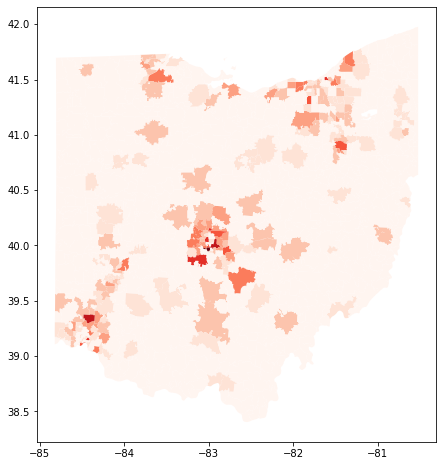

In [26]:
ohZipCodesWithStarbucks.plot(column='Total Starbucks',cmap='Reds',figsize=(10,8))

Or you can easily see the top 20 zip codes with most number of starbucks

In [27]:
ohZipCodesWithStarbucks.sort_values(by='Total Starbucks',ascending=False)

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Total Starbucks
556,43215,8600000US43215,43215,13240076,1463525,"POLYGON ((-83.06789 39.99126, -83.06495 39.990...",9
456,43219,8600000US43219,43219,43582591,329572,"POLYGON ((-82.97801 39.98031, -82.97626 39.981...",7
1030,45069,8600000US45069,45069,73646897,48577,"POLYGON ((-84.47863 39.37470, -84.40451 39.371...",7
518,43240,8600000US43240,43240,6496461,8932,"POLYGON ((-83.00192 40.13946, -82.99756 40.150...",6
875,45209,8600000US45209,45209,6123693,0,"POLYGON ((-84.45501 39.14566, -84.45313 39.146...",6
...,...,...,...,...,...,...,...
547,45766,8600000US45766,45766,76430120,291083,"POLYGON ((-82.32733 39.30200, -82.32594 39.302...",0
548,44647,8600000US44647,44647,74274496,416887,"POLYGON ((-81.63268 40.77596, -81.63014 40.775...",0
549,45767,8600000US45767,45767,294765149,1739760,"POLYGON ((-81.27202 39.48413, -81.26960 39.482...",0
550,45320,8600000US45320,45320,346580469,1007300,"POLYGON ((-84.81413 39.72656, -84.81413 39.726...",0


### Within

As we have seen previously within predicates checks whether a geometry is within another geometry. In the case of spatial geometries we are checking whether the records in a geodataframe are within the records in another geodataframe. Let use look into an example

Suppose we want to identify the corresponding zip codes for each of the starbucks. How can we do that. 

So you have the entire starbucks data and all the zip codes with in US

In [28]:
starbucks.head()

,pk_uid,geometry
0,1,POINT (-73.02315 40.82714)
1,2,POINT (-72.99688 40.82229)
2,3,POINT (-73.03259 40.77785)
3,4,POINT (-73.05505 40.86302)
4,5,POINT (-73.09551 40.78991)


In [29]:
zipUSA.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [30]:
startbucksWithZip = starbucks.sjoin(zipUSA,how = 'left',predicate='within')
startbucksWithZip

,pk_uid,geometry,index_right,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10
0,1,POINT (-73.02315 40.82714),16878.0,11738,8600000US11738,11738,1.381175e+07,0.000000e+00
1,2,POINT (-72.99688 40.82229),12115.0,11763,8600000US11763,11763,3.582652e+07,4.749000e+03
2,3,POINT (-73.03259 40.77785),9477.0,11772,8600000US11772,11772,4.188250e+07,1.179072e+06
3,4,POINT (-73.05505 40.86302),32176.0,11784,8600000US11784,11784,1.415482e+07,0.000000e+00
4,5,POINT (-73.09551 40.78991),6569.0,11779,8600000US11779,11779,3.248338e+07,8.598170e+05
...,...,...,...,...,...,...,...,...
16458,16459,POINT (-147.86755 64.81745),935.0,99709,8600000US99709,99709,1.317483e+09,2.050777e+07
16459,16460,POINT (-147.35394 64.75755),7010.0,99705,8600000US99705,99705,2.772859e+08,1.268655e+07
16460,16461,POINT (-134.56186 58.35966),6173.0,99801,8600000US99801,99801,5.704252e+09,7.901395e+08
16461,16462,POINT (-134.59482 58.37096),6173.0,99801,8600000US99801,99801,5.704252e+09,7.901395e+08


Now we can easily qquery for all the starbucks in zip code 44106

In [31]:
startbucksWithZip[startbucksWithZip.ZCTA5CE10=='44106']

,pk_uid,geometry,index_right,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10
7969,7970,POINT (-81.62175 41.50156),8968.0,44106,8600000US44106,44106,10918900.0,76016.0
8000,8001,POINT (-81.61757 41.50206),8968.0,44106,8600000US44106,44106,10918900.0,76016.0
8001,8002,POINT (-81.62066 41.50211),8968.0,44106,8600000US44106,44106,10918900.0,76016.0
8002,8003,POINT (-81.59411 41.50125),8968.0,44106,8600000US44106,44106,10918900.0,76016.0
8003,8004,POINT (-81.60588 41.50816),8968.0,44106,8600000US44106,44106,10918900.0,76016.0
8005,8006,POINT (-81.60444 41.51258),8968.0,44106,8600000US44106,44106,10918900.0,76016.0


Or easily find out the starbucks that doesnot have a zip code based on our spatial join

In [32]:
startbucksWithZip[startbucksWithZip.ZCTA5CE10.isnull()]

,pk_uid,geometry,index_right,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10
76,77,POINT (-66.00313 18.43837),NaN,NaN,NaN,NaN,NaN,NaN
78,79,POINT (-65.97534 18.39234),NaN,NaN,NaN,NaN,NaN,NaN
349,350,POINT (100.39498 6.19163),NaN,NaN,NaN,NaN,NaN,NaN
350,351,POINT (99.85187 6.30653),NaN,NaN,NaN,NaN,NaN,NaN
351,352,POINT (100.36627 6.12573),NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16407,16408,POINT (115.00300 4.99750),NaN,NaN,NaN,NaN,NaN,NaN
16408,16409,POINT (114.94309 4.90920),NaN,NaN,NaN,NaN,NaN,NaN
16409,16410,POINT (115.24984 5.29384),NaN,NaN,NaN,NaN,NaN,NaN
16410,16411,POINT (114.93444 4.94473),NaN,NaN,NaN,NaN,NaN,NaN


In the next lecture we will look at the remaining predicates as well as layering operations. 